# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [15]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['tasiilaq',
 'virden',
 'bambous virieux',
 'mataura',
 'souillac',
 'totma',
 'yellowknife',
 'cape town',
 'albany',
 'fortuna',
 'constitucion',
 'kantabanji',
 'ilulissat',
 'dikson',
 'hirado',
 'busselton',
 'georgetown',
 'lianyuan',
 'haimen',
 'atuona',
 'cururupu',
 'airai',
 'vila franca do campo',
 'ushuaia',
 'svetlaya',
 'iqaluit',
 'zhangjiakou',
 'tessalit',
 'vaitupu',
 'yulara',
 'berlevag',
 'jamestown',
 'meyungs',
 'punta arenas',
 'hella',
 'ishigaki',
 'bredasdorp',
 'kapaa',
 'kodiak',
 'tammisaari',
 'bariadi',
 'cabedelo',
 'barbar',
 'rikitea',
 'bluff',
 'makakilo city',
 'churapcha',
 'illoqqortoormiut',
 'innisfail',
 'ribeira grande',
 'bilibino',
 'esperance',
 'yanji',
 'carnarvon',
 'naze',
 'talnakh',
 'darhan',
 'arraial do cabo',
 'cidreira',
 'grand river south east',
 'skibbereen',
 'kantunil',
 'sioux lookout',
 'puerto ayora',
 'comodoro rivadavia',
 'aljezur',
 'cabo san lucas',
 'castro',
 'kaitangata',
 'mahebourg',
 'sovetskiy',
 'vaini',
 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [29]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

record_count = 0
record_set = 1



weather_df = pd.DataFrame({'City': cities, 'Cloudiness': "",  'Date': "",
                            'Humidity': "", 'Lat': "", 'Lng': "", 'Max Temp': "", 'Windspeed': ""})

print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities: 
    base_url= "http://api.openweathermap.org/data/2.5/weather?q=" + city + "&APPID=" + weather_api_key
    
    response = requests.get(base_url).json()
    
    try:
        print(f'Processing Weather Data for Record {record_count} | {response["name"]}')
        
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        
        record_count += 1
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        

      
        
print("------------------------------\nData Retrieval Complete\n------------------------------")



Beginning Data Retrieval
-----------------------------
Processing Weather Data for Record 0 | Tasiilaq
Processing Weather Data for Record 1 | Virden
Processing Weather Data for Record 2 | Bambous Virieux
Processing Weather Data for Record 3 | Mataura
Processing Weather Data for Record 4 | Souillac
Processing Weather Data for Record 5 | Tot'ma
Processing Weather Data for Record 6 | Yellowknife
Processing Weather Data for Record 7 | Cape Town
Processing Weather Data for Record 8 | Albany
Processing Weather Data for Record 9 | Fortuna
Processing Weather Data for Record 10 | Constitución
Processing Weather Data for Record 11 | Kantābānji
Processing Weather Data for Record 12 | Ilulissat
Processing Weather Data for Record 13 | Dikson
Processing Weather Data for Record 14 | Hirado
Processing Weather Data for Record 15 | Busselton
Processing Weather Data for Record 16 | George Town
Processing Weather Data for Record 17 | Lianyuan
Processing Weather Data for Record 18 | Haimen
Processing Weath

Processing Weather Data for Record 159 | Laas
Processing Weather Data for Record 160 | Marshalltown
Processing Weather Data for Record 161 | Sumbe
Processing Weather Data for Record 162 | Olafsvik
Processing Weather Data for Record 163 | Hastings
Processing Weather Data for Record 164 | Payo
Processing Weather Data for Record 165 | Los Llanos de Aridane
City not found. Skipping...
Processing Weather Data for Record 166 | Dekar
City not found. Skipping...
Processing Weather Data for Record 167 | Santarém
Processing Weather Data for Record 168 | São José da Coroa Grande
City not found. Skipping...
Processing Weather Data for Record 169 | Hīt
Processing Weather Data for Record 170 | Lagoa
Processing Weather Data for Record 171 | College
Processing Weather Data for Record 172 | Muisne
Processing Weather Data for Record 173 | Saint-Philippe
Processing Weather Data for Record 174 | Muzhi
Processing Weather Data for Record 175 | Wasilla
Processing Weather Data for Record 176 | Hermanus
City n

Processing Weather Data for Record 313 | Kisesa
Processing Weather Data for Record 314 | Haines Junction
Processing Weather Data for Record 315 | Ginir
Processing Weather Data for Record 316 | Camocim
Processing Weather Data for Record 317 | Deputatsky
Processing Weather Data for Record 318 | George Town
Processing Weather Data for Record 319 | Camaná
Processing Weather Data for Record 320 | Valdivia
City not found. Skipping...
Processing Weather Data for Record 321 | Natitingou
Processing Weather Data for Record 322 | Bazarnyy Karabulak
Processing Weather Data for Record 323 | Asău
Processing Weather Data for Record 324 | Messina
Processing Weather Data for Record 325 | Oranjemund
Processing Weather Data for Record 326 | Lázaro Cárdenas
City not found. Skipping...
Processing Weather Data for Record 327 | Moyo
Processing Weather Data for Record 328 | Torbay
Processing Weather Data for Record 329 | Tazovsky
Processing Weather Data for Record 330 | Lofthus
Processing Weather Data for Rec

Processing Weather Data for Record 467 | Nantucket
Processing Weather Data for Record 468 | Aga
Processing Weather Data for Record 469 | Boulder City
Processing Weather Data for Record 470 | Basco
Processing Weather Data for Record 471 | South Lake Tahoe
Processing Weather Data for Record 472 | Kyshtovka
Processing Weather Data for Record 473 | Kargil
Processing Weather Data for Record 474 | Stará Turá
Processing Weather Data for Record 475 | Tiarei
Processing Weather Data for Record 476 | Valverde del Camino
Processing Weather Data for Record 477 | Rocha
Processing Weather Data for Record 478 | Shakhun'ya
Processing Weather Data for Record 479 | Mount Isa
Processing Weather Data for Record 480 | Mazara del Vallo
Processing Weather Data for Record 481 | Ulaanbaatar
Processing Weather Data for Record 482 | Concepción del Oro
Processing Weather Data for Record 483 | Ocean Springs
Processing Weather Data for Record 484 | Rørvik
Processing Weather Data for Record 485 | Shahr-e Bābak
Proces

KeyboardInterrupt: 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [28]:
new_weather = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

weather_data = pd.DataFrame(new_weather)

weather_data.count()

City          551
Cloudiness    551
Country       551
Date          551
Humidity      551
Lat           551
Lng           551
Max Temp      551
Wind Speed    551
dtype: int64

In [35]:
weather_data.to_csv('../output_data/weather_data.csv')

weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Tasiilaq,0,GL,1593737648,66,65.61,-37.64,282.15,2.60
1,Virden,100,US,1593737648,85,39.50,-89.77,300.37,0.45
2,Bambous Virieux,40,MU,1593737649,78,-20.34,57.76,295.15,6.70
3,Mataura,100,NZ,1593737649,83,-46.19,168.86,277.04,1.34
4,Souillac,40,MU,1593737649,78,-20.52,57.52,295.15,6.70


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

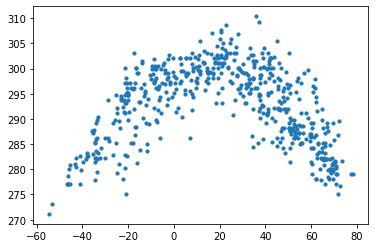

In [36]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

## Latitude vs. Humidity Plot

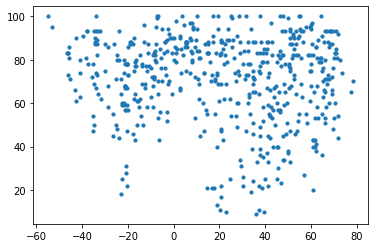

In [37]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

## Latitude vs. Cloudiness Plot

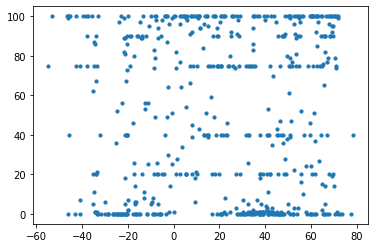

In [38]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

## Latitude vs. Wind Speed Plot

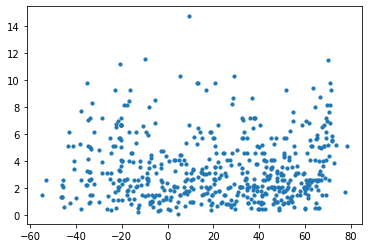

In [39]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

## Linear Regression

In [7]:
# OPTIONAL: Create a function to create Linear Regression plots

In [8]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression